## KNN Approach



### Setup

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction

In [2]:
## adapt this directory to your needs
# TODO-> change path to be dynamic 
base_dir = '/home/bac/activity_prediction/implementation/'
data_dir = base_dir + 'data/'

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir+"ACHE/ache.csv")

nn_data_raw

,INDEX,NAME,Hydrophobic_Interaction:PHE297A,Pi-Cation_Interaction:TRP86A,Water_Bridge:GLY120A,Pi-Stacking:TRP86A,Hydrophobic_Interaction:TYR341A,Halogen_Bond:THR75A,Halogen_Bond:TRP286A,Hydrogen_Bond:ASN87A,...,Water_Bridge:THR83A,Hydrogen_Bond:GLN291A,Halogen_Bond:GLY120A,Water_Bridge:THR75A,Pi-Cation_Interaction:TYR341A,Hydrogen_Bond:SER125A,Water_Bridge:ALA204A,Pi-Stacking:TYR124A,Hydrophobic_Interaction:GLU202A,LABEL
0,1,CHEMBL397271|actives_final|sdf|151,0,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1,2,CHEMBL481|actives_final|sdf|20,1,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,active
2,3,CHEMBL244230|actives_final|sdf|54,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
3,4,CHEMBL1094633|actives_final|sdf|85,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,active
4,5,CHEMBL191386|actives_final|sdf|308,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,CHEMBL576005|actives_final|sdf|279,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
999,1000,CHEMBL153865|actives_final|sdf|341,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1000,1001,CHEMBL146674|actives_final|sdf|297,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1001,1002,ZINC04195090|decoys_final2|sdf|324,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [72]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1)                 136       
                                                                 
Total params: 136 (544.00 Byte)
Trainable params: 136 (544.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150
36/36 - 1s - loss: 0.6996 - accuracy: 0.5169 - val_loss: 0.6840 - val_accuracy: 0.6170 - 837ms/epoch - 23ms/step
Epoch 2/150
36/36 - 0s - loss: 0.6649 - accuracy: 0.5936 - val_loss: 0.6638 - val_accuracy: 0.6454 - 127ms/epoch - 4ms/step
Epoch 3/150
36/36 - 0s - loss: 0.6369 - accuracy: 0.6542 - val_loss: 0.6474 - val_accuracy: 0.6454 - 131ms/epoch - 4ms/step
Epoch 4/150
36/36 - 0s - loss: 0.6146 - accuracy: 0.6898 - val_loss: 0.6335 - val_accuracy: 0.6596 - 117ms/epoch - 3ms/step
Epoch 5/150
36/36 - 0s - loss: 0.5955 - accuracy: 0.7201 - val_loss: 0.6210 - val_accuracy: 0.6596 - 127ms/epoch - 4ms/step
Epoch 6/150
36/36 - 0s - loss: 0.5777 - accuracy: 0.7291 - val_loss: 0.6097 - val_accuracy: 0.6809 - 129ms/epoch - 4ms/step
Epoch 7/150
36/36 - 0s - loss: 0.5626 - accuracy: 0.7451 - val_loss: 0.5993 - val_accuracy: 0.6950 - 127ms/epoch - 4ms/step
Epoch 8/150
36/36 - 0s - loss: 0.5498 - accuracy: 0.7629 - val_loss: 0.5905 - val_accuracy: 0.7092 - 118ms/epoch - 3ms/step
Epoch 9

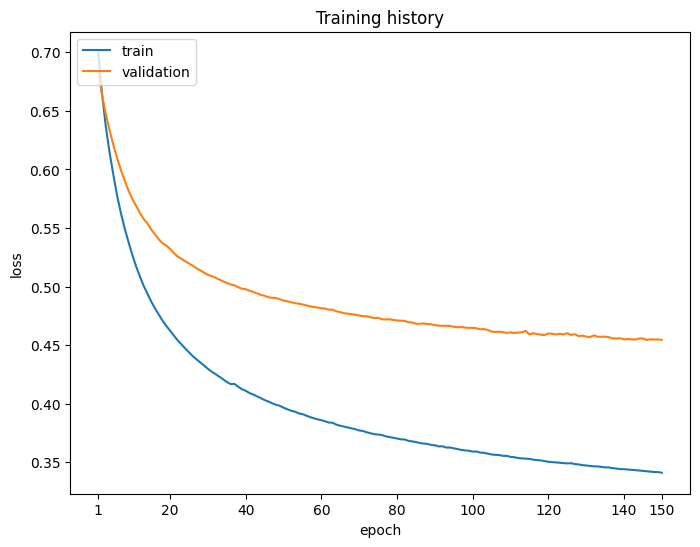

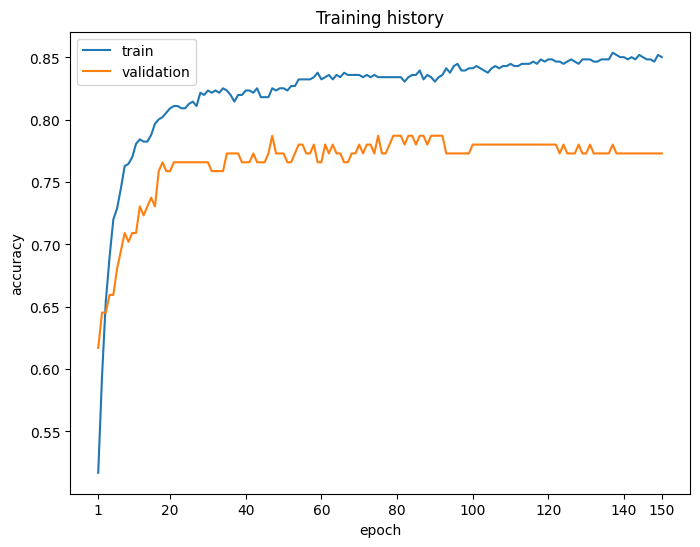

In [73]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [77]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


10/10 [==============================] - 0s 4ms/step


### Prepare Data for evaluation

In [78]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])
result_df = result_df.drop(columns="NAME")

for i, row in enumerate(X_test):
    data = [i]
    data.extend(row)
    result_df.loc[len(result_df["INDEX"])] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df

,INDEX,Hydrophobic_Interaction:PHE297A,Pi-Cation_Interaction:TRP86A,Water_Bridge:GLY120A,Pi-Stacking:TRP86A,Hydrophobic_Interaction:TYR341A,Halogen_Bond:THR75A,Halogen_Bond:TRP286A,Hydrogen_Bond:ASN87A,Hydrophobic_Interaction:TYR119A,...,Hydrogen_Bond:GLN291A,Halogen_Bond:GLY120A,Water_Bridge:THR75A,Pi-Cation_Interaction:TYR341A,Hydrogen_Bond:SER125A,Water_Bridge:ALA204A,Pi-Stacking:TYR124A,Hydrophobic_Interaction:GLU202A,LABEL,PRED
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2,2,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,4,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,296,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
297,297,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,298,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
299,299,1,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
